In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NGCMS/file.csv')
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [5]:
df['State_name'] = df['State_name'].str.lower().str.replace(' ', '')

# Save the modified dataset
df.to_csv("modified_dataset.csv", index=False)

In [7]:
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,jammuandkashmir,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,jammuandkashmir,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,jammuandkashmir,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,jammuandkashmir,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,jammuandkashmir,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [ ]:
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

Hide Indexes

In [ ]:
df.style.hide_index()

<ipython-input-11-046e9c3a6dbb>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


In [ ]:
df.describe

<bound method NDFrame.describe of      District_code                   State_name              District_name  \
0                1            JAMMU AND KASHMIR                    Kupwara   
1                2            JAMMU AND KASHMIR                     Badgam   
2                3            JAMMU AND KASHMIR                Leh(Ladakh)   
3                4            JAMMU AND KASHMIR                     Kargil   
4                5            JAMMU AND KASHMIR                      Punch   
..             ...                          ...                        ...   
635            636                  PONDICHERRY                       Mahe   
636            637                  PONDICHERRY                   Karaikal   
637            638  ANDAMAN AND NICOBAR ISLANDS                   Nicobars   
638            639  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman   
639            640  ANDAMAN AND NICOBAR ISLANDS              South Andaman   

     Population    Male  Female  Literate  Workers  Male_Workers  \
0        870354  474190  396164    439654   229064        190899   
1        753745  398041  355704    335649   214866        162578   
2        133487   78971   54516     93770    75079         53265   
3        140802   77785   63017     86236    51873         39839   
4        476835  251899  224936    261724   161393        117677   
..          ...     ...     ...       ...      ...           ...   
635       41816   19143   22673     36470    11802          9093   
636      200222   97809  102413    154916    68301         53139   
637       36842   20727   16115     25332    17125         12714   
638      105597   54861   50736     78683    38579         30612   
639      238142  127283  110859    190266    96831         77563   

     Female_Workers  ...  Christians  Sikhs  Buddhists  Jains  \
0             38165  ...        1700   5600         66     39   
1             52288  ...        1489   5559         47      6   
2             21814  ...         658   1092      88635    103   
3             12034  ...         604   1171      20126     28   
4             43716  ...         958  11188         83     10   
..              ...  ...         ...    ...        ...    ...   
635            2709  ...         958      3         21     14   
636           15162  ...       18391     46         63     54   
637            4411  ...       26077    343        119      0   
638            7967  ...       21870     77         84      4   
639           19268  ...       33037    866        135     27   

     Secondary_Education  Higher_Education  Graduate_Education  \
0                  74948             39709               21751   
1                  66459             41367               27950   
2                  16265              8923                6197   
3                  16938              9826                3077   
4                  46062             29517               13962   
..                   ...               ...                 ...   
635                 8773              5711                4475   
636                29456             15930               18998   
637                 6325              3668                1300   
638                12707             10042                5133   
639                42150             29910               22388   

     Age_Group_0_29  Age_Group_30_49  Age_Group_50  
0            600759           178435         89679  
1            503223           160933         88978  
2             70703            41515         21019  
3             87532            35561         17488  
4            304979           109818         61334  
..              ...              ...           ...  
635           19760            12543          9428  
636          102333            60089         37434  
637           18786            12088          5922  
638           57350            30741         17464  
639          128402            76332         33128  

[

In [ ]:
df.shape

(640, 25)

set a caption

In [ ]:
df.style.set_caption('Census Of India 2011 DataFrame')

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
5,6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
6,7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
7,8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
8,9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
9,10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


show the records related with district-NewDelhi,Amritsar,Sonipat,Jaipur

In [ ]:
df[df['District_name'].isin(['New Delhi','Amritsar','Sonipat','Jaipur'])]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
48,49,PUNJAB,Amritsar,2490656,1318408,1172248,1684770,917856,735195,182661,...,54344,1716935,876,3152,328229,203656,142399,1384987,667193,436496
75,76,HARYANA,Sonipat,1450001,781299,668702,998316,523179,391085,132094,...,1405,4484,336,6033,224639,150760,101186,855201,360216,233318
93,94,NCT OF DELHI,New Delhi,142004,77942,64062,114179,59541,46940,12601,...,4852,2933,312,679,15942,17742,23934,76076,43913,21773
109,110,RAJASTHAN,Jaipur,6626178,3468507,3157671,4300965,2464893,1714947,749946,...,12708,18782,1020,81079,659389,455527,703673,4091148,1646480,884057


**Calculate State-wise:**
1. Totoal No. of Population


In [ ]:
df.groupby('State_name').Population.sum()

State_name
ANDAMAN AND NICOBAR ISLANDS       380581
ANDHRA PRADESH                  84580777
ARUNACHAL PRADESH                1383727
ASSAM                           31205576
BIHAR                          104099452
CHANDIGARH                       1055450
CHHATTISGARH                    25545198
DADRA AND NAGAR HAVELI            343709
DAMAN AND DIU                     243247
GOA                              1458545
GUJARAT                         60439692
HARYANA                         25351462
HIMACHAL PRADESH                 6864602
JAMMU AND KASHMIR               12541302
JHARKHAND                       32988134
KARNATAKA                       61095297
KERALA                          33406061
LAKSHADWEEP                        64473
MADHYA PRADESH                  72626809
MAHARASHTRA                    112374333
MANIPUR                          2855794
MEGHALAYA                        2966889
MIZORAM                          1097206
NAGALAND                         1978502
NCT O

In [ ]:
df.groupby('State_name').Female.sum().sort_values(ascending=False)

State_name
UTTAR PRADESH                  95331831
MAHARASHTRA                    54131277
BIHAR                          49821295
WEST BENGAL                    44467088
ANDHRA PRADESH                 42138631
TAMIL NADU                     36009055
MADHYA PRADESH                 35014503
RAJASTHAN                      32997440
KARNATAKA                      30128640
GUJARAT                        28948432
ORISSA                         20762082
KERALA                         17378649
JHARKHAND                      16057819
ASSAM                          15266133
PUNJAB                         13103873
CHHATTISGARH                   12712303
HARYANA                        11856728
NCT OF DELHI                    7800615
JAMMU AND KASHMIR               5900640
UTTARAKHAND                     4948519
HIMACHAL PRADESH                3382729
TRIPURA                         1799541
MEGHALAYA                       1475057
MANIPUR                         1417208
NAGALAND                     

In [ ]:
df.groupby('State_name').Male.sum().sort_values(ascending=False)

State_name
UTTAR PRADESH                  104480510
MAHARASHTRA                     58243056
BIHAR                           54278157
WEST BENGAL                     46809027
ANDHRA PRADESH                  42442146
MADHYA PRADESH                  37612306
TAMIL NADU                      36137975
RAJASTHAN                       35550997
GUJARAT                         31491260
KARNATAKA                       30966657
ORISSA                          21212136
JHARKHAND                       16930315
KERALA                          16027412
ASSAM                           15939443
PUNJAB                          14639465
HARYANA                         13494734
CHHATTISGARH                    12832895
NCT OF DELHI                     8987326
JAMMU AND KASHMIR                6640662
UTTARAKHAND                      5137773
HIMACHAL PRADESH                 3481873
TRIPURA                          1874376
MEGHALAYA                        1491832
MANIPUR                          1438586
NAGAL

2. Total Number of Population with different Religion

In [ ]:
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [ ]:
df.groupby('State_name')['Hindus','Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains'].sum().sort_values(by='State_name')

<ipython-input-16-b608d4606a39>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('State_name')['Hindus','Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains'].sum().sort_values(by='State_name')


,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains
State_name,,,,,,
ANDAMAN AND NICOBAR ISLANDS,264296,32413,80984,1286,338,31
ANDHRA PRADESH,74824149,8082412,1129784,40244,36692,53849
ARUNACHAL PRADESH,401876,27045,418732,3287,162815,771
ASSAM,19180759,10679345,1165867,20672,54993,25949
BIHAR,86078686,17557809,129247,23779,25453,18914
CHANDIGARH,852574,51447,8720,138329,1160,1960
CHHATTISGARH,23819789,514998,490542,70036,70467,61510
DADRA AND NAGAR HAVELI,322857,12922,5113,217,634,1186
DAMAN AND DIU,220150,19277,2820,172,217,287


How many Male/Female Workers in Uttar Pradesh ?

In [ ]:
df[df.State_name=='UTTAR PRADESH']['Male_Workers'].sum()

49846762

In [ ]:
df[df.State_name=='UTTAR PRADESH']['Female_Workers'].sum()

15967953

set a column as index of the dataframe

In [ ]:
df.set_index('District_code')

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,43,...,958,3,21,14,8773,5711,4475,19760,12543,9428
637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,2372,...,18391,46,63,54,29456,15930,18998,102333,60089,37434
638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,322,...,26077,343,119,0,6325,3668,1300,18786,12088,5922


In [ ]:
x = df['Population']

In [ ]:
xpos=np.arange(len(x))
xpos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

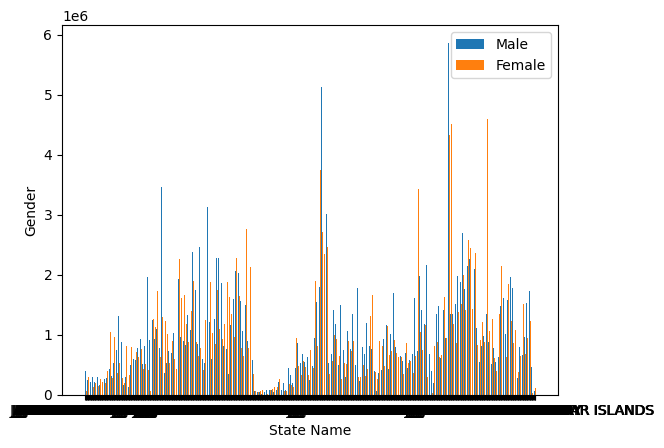

In [ ]:
plt.xticks(xpos,df['State_name'])
plt.xlabel('State Name')
plt.ylabel('Gender')
plt.bar(xpos-.2,df.Male,width=0.4,label='Male')
plt.bar(xpos+.2,df.Female,width=0.4,label='Female')
plt.legend()

In [ ]:
grouped_data = df.groupby('State_name').sum()

# Resetting the index to have 'State_name' as a column
grouped_data.reset_index(inplace=True)

grouped_data['State_name'] = grouped_data['State_name'].apply(lambda x: x[0] + x[-1])
# Grouping the data by modified 'State_name' and summing the values within each group
grouped_data = grouped_data.groupby('State_name').sum()

grouped_data.reset_index(inplace=True)
grouped_data

<ipython-input-51-f74f65cf6b96>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('State_name').sum()


,State_name,District_code,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,AH,5,887232,477012,410220,429419,289945,215843,74102,76168,...,2147,6651,88682,109,82724,50290,34147,573926,202448,109997
1,AM,4,140802,77785,63017,86236,51873,39839,12034,8266,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
2,AS,1,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
3,BR,5,476835,251899,224936,261724,161393,117677,43716,54264,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
4,CH,13,1258850,671460,587390,753313,491343,346300,145043,206060,...,2811,25064,213,42,157443,83498,42906,762767,313288,181003
5,DI,8,1008039,534733,473306,545149,304200,249581,54619,57495,...,1497,14770,140,29,107837,57932,48285,636524,239659,130513
6,DU,9,392232,207680,184552,185979,149317,101380,47937,28232,...,572,555,44,17,35630,18644,12721,252378,90465,48802
7,GA,10,1236829,651124,585705,748584,407188,333151,74037,12228,...,2746,12187,285,74,176409,132727,121856,693238,351561,190330
8,GT,11,297446,158720,138726,143276,100890,73305,27585,15337,...,406,486,25,8,28247,15005,9633,194165,66945,35911
9,HA,12,560440,293064,267376,293958,188420,138428,49992,49746,...,1109,9440,35,6,67368,40931,31286,342601,137032,80111


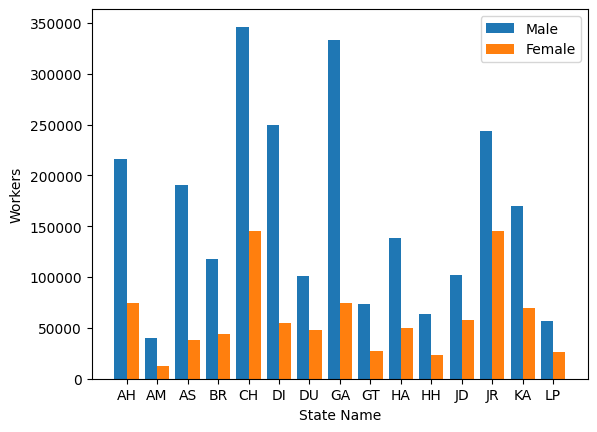

In [ ]:
half_data = grouped_data.head(len(grouped_data)//2)

x = half_data['Population']
xpos = np.arange(len(x))

plt.xticks(xpos, half_data['State_name'])
plt.xlabel('State Name')
plt.ylabel('Workers')
plt.bar(xpos - 0.2, half_data['Male_Workers'], width=0.4, label='Male')
plt.bar(xpos + 0.2, half_data['Female_Workers'], width=0.4, label='Female')
plt.legend()
plt.show()

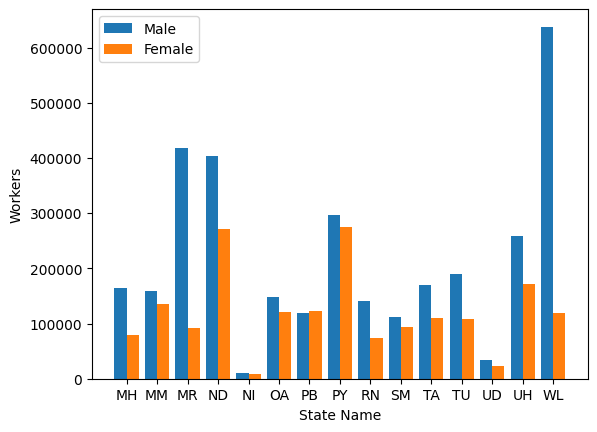

In [ ]:
second_half_data = grouped_data.tail(len(grouped_data)//2)

x = second_half_data['Population']
xpos = np.arange(len(x))

plt.xticks(xpos, second_half_data['State_name'])
plt.xlabel('State Name')
plt.ylabel('Workers')
plt.bar(xpos - 0.2, second_half_data['Male_Workers'], width=0.4, label='Male')
plt.bar(xpos + 0.2, second_half_data['Female_Workers'], width=0.4, label='Female')
plt.legend()
plt.show()

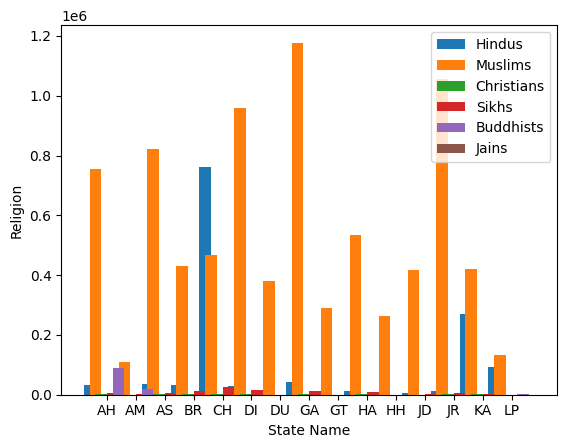

In [ ]:
half_data = grouped_data.head(len(grouped_data)//2)
x = half_data['Population']
xpos = np.arange(len(x))

plt.xticks(xpos, half_data['State_name'])
plt.xlabel('State Name')
plt.ylabel('Religion')
plt.bar(xpos - 0.6, half_data['Hindus'], width=0.4, label='Hindus')
plt.bar(xpos - 0.4, half_data['Muslims'], width=0.4, label='Muslims')
plt.bar(xpos - 0.2, half_data['Christians'], width=0.4, label='Christians')
plt.bar(xpos + 0.2, half_data['Sikhs'], width=0.4, label='Sikhs')
plt.bar(xpos + 0.4, half_data['Buddhists'], width=0.4, label='Buddhists')
plt.bar(xpos + 0.6, half_data['Jains'], width=0.4, label='Jains')
plt.legend()
plt.show()

In [ ]:
df['Hindus']

0       37128
1       10110
2       22882
3       10341
4       32604
        ...  
635     27940
636    152638
637      8681
638     81163
639    174452
Name: Hindus, Length: 640, dtype: int64

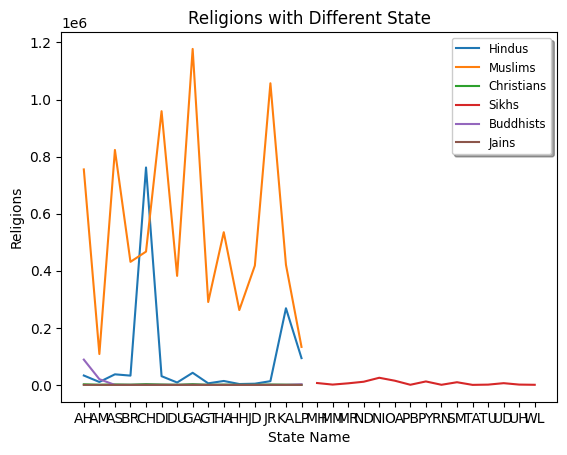

In [ ]:
plt.xlabel('State Name')
plt.ylabel('Religions')
plt.title("Religions with Different State")
plt.plot(half_data['State_name'],half_data['Hindus'],label='Hindus')
plt.plot(half_data['State_name'],half_data['Muslims'],label='Muslims')
plt.plot(half_data['State_name'],half_data['Christians'],label='Christians')
plt.plot(second_half_data['State_name'],half_data['Sikhs'],label='Sikhs')
plt.plot(half_data['State_name'],half_data['Buddhists'],label='Buddhists')
plt.plot(half_data['State_name'],half_data['Jains'],label='Jains')

plt.legend(loc='best',fontsize='small',shadow=True)

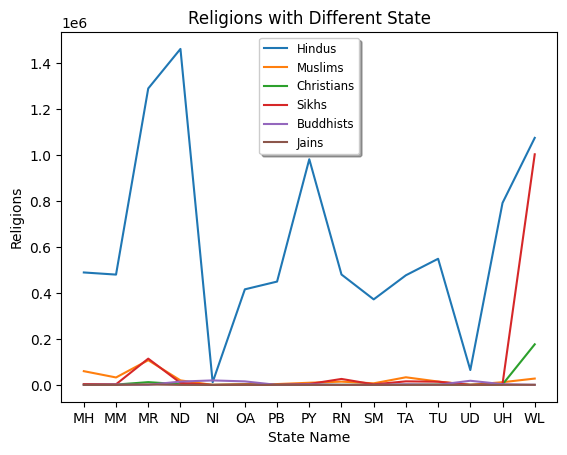

In [ ]:
plt.xlabel('State Name')
plt.ylabel('Religions')
plt.title("Religions with Different State")
plt.plot(second_half_data['State_name'],second_half_data['Hindus'],label='Hindus')
plt.plot(second_half_data['State_name'],second_half_data['Muslims'],label='Muslims')
plt.plot(second_half_data['State_name'],second_half_data['Christians'],label='Christians')
plt.plot(second_half_data['State_name'],second_half_data['Sikhs'],label='Sikhs')
plt.plot(second_half_data['State_name'],second_half_data['Buddhists'],label='Buddhists')
plt.plot(second_half_data['State_name'],second_half_data['Jains'],label='Jains')

plt.legend(loc='best',fontsize='small',shadow=True)

In [ ]:
secondary=grouped_data['Secondary_Education'].sum()
higher=grouped_data['Higher_Education'].sum()
graduate=grouped_data['Graduate_Education'].sum()

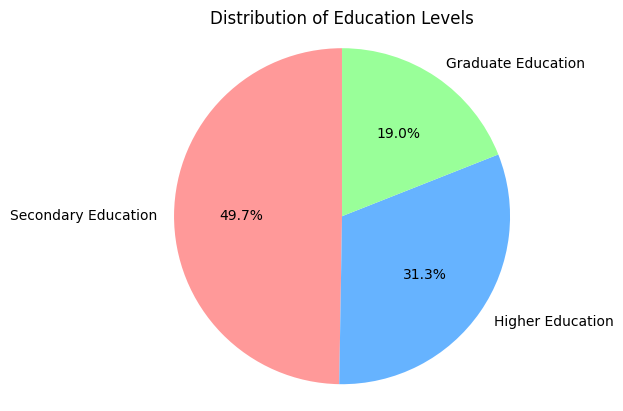

In [ ]:
labels_education = ['Secondary Education', 'Higher Education', 'Graduate Education']
sizes_education = [secondary, higher, graduate]

# Colors for each section
colors_education = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting the pie chart
plt.pie(sizes_education, labels=labels_education, autopct='%1.1f%%', startangle=90, colors=colors_education)
plt.title('Distribution of Education Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [ ]:

small=grouped_data['Age_Group_0_29'].sum()
medium=grouped_data['Age_Group_30_49'].sum()
large=grouped_data['Age_Group_50'].sum()

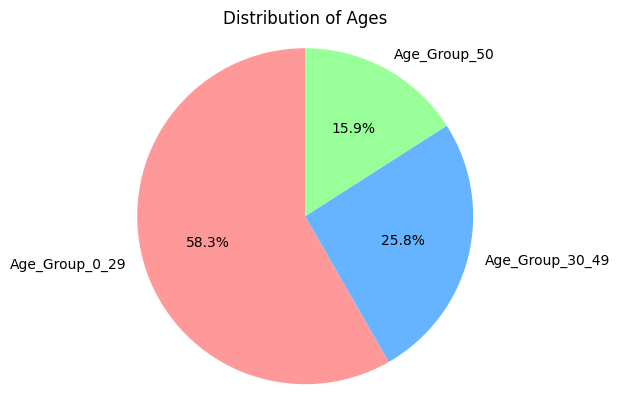

In [ ]:
labels_education = ['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']
sizes_education = [small, medium, large]

# Colors for each section
colors_education = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting the pie chart
plt.pie(sizes_education, labels=labels_education, autopct='%1.1f%%', startangle=90, colors=colors_education)
plt.title('Distribution of Ages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

# **Literacy Rate**

In [ ]:
# Group the data by "State_name" and calculate total literate population and total population for each state
statewise_population = df.groupby("State_name")[["Literate", "Population"]].sum()

# Calculate literacy rate for each state
statewise_population["Literacy Rate"] = (statewise_population["Literate"] / statewise_population["Population"]) * 100

# Sort the DataFrame by "Literacy Rate" column in descending order
statewise_population_sorted = statewise_population.sort_values(by="Literacy Rate", ascending=False)

print(statewise_population_sorted)

                              Literate  Population  Literacy Rate
State_name                                                       
KERALA                        28135824    33406061      84.223710
LAKSHADWEEP                      52553       64473      81.511641
GOA                            1165487     1458545      79.907511
DAMAN AND DIU                   188406      243247      77.454604
ANDAMAN AND NICOBAR ISLANDS     294281      380581      77.324144
MIZORAM                         848175     1097206      77.303168
PONDICHERRY                     957309     1247953      76.710341
TRIPURA                        2804783     3673917      76.343124
CHANDIGARH                      805438     1055450      76.312284
NCT OF DELHI                  12737767    16787941      75.874504
HIMACHAL PRADESH               5039736     6864602      73.416288
SIKKIM                          444952      610577      72.874019
MAHARASHTRA                   81554290   112374333      72.573770
TAMIL NADU

# **Sex Ratio**

In [ ]:
# Group the data by "State_name" and calculate total male and female population for each state
statewise_population = df.groupby("State_name")[["Male", "Female"]].sum()

# Calculate male-female ratio for each state
statewise_population["Male-Female Ratio"] = statewise_population["Male"] / statewise_population["Female"]

# Sort the DataFrame by "Male-Female Ratio" column in descending order
statewise_population_sorted = statewise_population.sort_values(by="Male-Female Ratio", ascending=False)

print(statewise_population_sorted)

                                  Male    Female  Male-Female Ratio
State_name                                                         
DAMAN AND DIU                   150301     92946           1.617079
DADRA AND NAGAR HAVELI          193760    149949           1.292173
CHANDIGARH                      580663    474787           1.222997
NCT OF DELHI                   8987326   7800615           1.152130
ANDAMAN AND NICOBAR ISLANDS     202871    177710           1.141585
HARYANA                       13494734  11856728           1.138150
JAMMU AND KASHMIR              6640662   5900640           1.125414
SIKKIM                          323070    287507           1.123694
PUNJAB                        14639465  13103873           1.117186
UTTAR PRADESH                104480510  95331831           1.095967
BIHAR                         54278157  49821295           1.089457
GUJARAT                       31491260  28948432           1.087840
RAJASTHAN                     35550997  32997440

# **Birth rate**

In [ ]:
statewise_population = df.groupby("State_name")["Population"].sum()

# Extracting population counts for each age group
age_group_0_29 = df["Age_Group_0_29"]
age_group_30_49 = df["Age_Group_30_49"]
age_group_50 = df["Age_Group_50"]

# Assuming a constant fertility rate (e.g., number of births per woman per year)
# You can adjust this value based on available fertility rate data
# This is a simplified approach and may not reflect the actual fertility rate of each state
fertility_rate = 0.025  # Example fertility rate of 0.025 births per woman per year

# Estimate the number of births per year for each state
# This estimation assumes that individuals in the age group 15-49 are in reproductive age
# You may need to adjust this based on your specific requirements and available data
estimated_births_per_year = (age_group_0_29 + age_group_30_49) * fertility_rate

# Calculate the birth rate for each state
birth_rate = estimated_births_per_year / statewise_population

# Print the estimated birth rate for each state
print(birth_rate)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
                 ..
TAMIL NADU      NaN
TRIPURA         NaN
UTTAR PRADESH   NaN
UTTARAKHAND     NaN
WEST BENGAL     NaN
Length: 675, dtype: float64


# **Dependency Ratio**

In [ ]:
# Calculate total population for each state
statewise_population = df.groupby("State_name")["Population"].sum()

# Extract population counts for each age group
age_group_0_29 = df.groupby("State_name")["Age_Group_0_29"].sum()
age_group_30_49 = df.groupby("State_name")["Age_Group_30_49"].sum()
age_group_50 = df.groupby("State_name")["Age_Group_50"].sum()

# Calculate total non-working age population for each state
total_non_working_age_population = age_group_0_29

# Calculate total working age population for each state
total_working_age_population = age_group_30_49 + age_group_50

# Calculate dependency ratio for each state
dependency_ratio = (total_non_working_age_population / total_working_age_population) * 100

# Create a DataFrame to include state names and dependency ratios
dependency_df = pd.DataFrame({
    'Dependency Ratio': dependency_ratio  # Dependency ratios
})

# Print the DataFrame
print(dependency_df)

                             Dependency Ratio
State_name                                   
ANDAMAN AND NICOBAR ISLANDS        116.429771
ANDHRA PRADESH                     120.587615
ARUNACHAL PRADESH                  189.482469
ASSAM                              156.792680
BIHAR                              182.045918
CHANDIGARH                         133.072745
CHHATTISGARH                       147.989265
DADRA AND NAGAR HAVELI             190.387706
DAMAN AND DIU                      170.398655
GOA                                 91.375149
GUJARAT                            133.066236
HARYANA                            145.511362
HIMACHAL PRADESH                   113.829223
JAMMU AND KASHMIR                  160.909094
JHARKHAND                          167.361207
KARNATAKA                          123.026902
KERALA                              88.965432
LAKSHADWEEP                        111.141367
MADHYA PRADESH                     156.521855
MAHARASHTRA                       